In [14]:
#0. import items
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [15]:
#1. load dataset, im picking one that's built in
data = load_breast_cancer()
X = data.data
y = data.target  # already 0 or 1

In [16]:
#2. pick ONE feature so we can plot the sigmoid curve
# i'm choosing "mean radius" because it's easy to visualize and separates classes
feature_index = list(data.feature_names).index("mean radius")
X = X[:, [feature_index]]

In [17]:
#3. add bias column (turns feature into vector [1,x] -> used from the vector worksheet we did)
X = np.hstack((np.ones((X.shape[0], 1)), X))

In [18]:
#4. scale the feature so gradient descent doesn't blow up
scaler = StandardScaler()
X[:, 1] = scaler.fit_transform(X[:, 1].reshape(-1, 1)).flatten()

In [19]:
#5. defines sigmoid, just like the logistic regression worksheet
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [20]:
#6. cross entropy loss (also directly from worksheet part C)
def compute_loss(y, y_hat):
    return -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))

In [21]:
#7. gradient descent step
def gradient_descent(X, y, theta, lr):
    m = len(y)

    #X @ theta gives predictions for ENTIRE dataset at once (Multiple Variable Vector Operations worksheet part d)
    z = X @ theta
    y_hat = sigmoid(z)

    #y_hat - y is element wise subtraction (MVVO worksheet part b)
    error = y_hat - y

    #gradient formula
    gradient = (1/m) * (X.T @ error)
    theta = theta - lr * gradient
    return theta, y_hat

In [22]:
#8. initialize parameters and settings
theta = np.zeros(X.shape[1])
lr = 0.1
epochs = 2000
losses = []

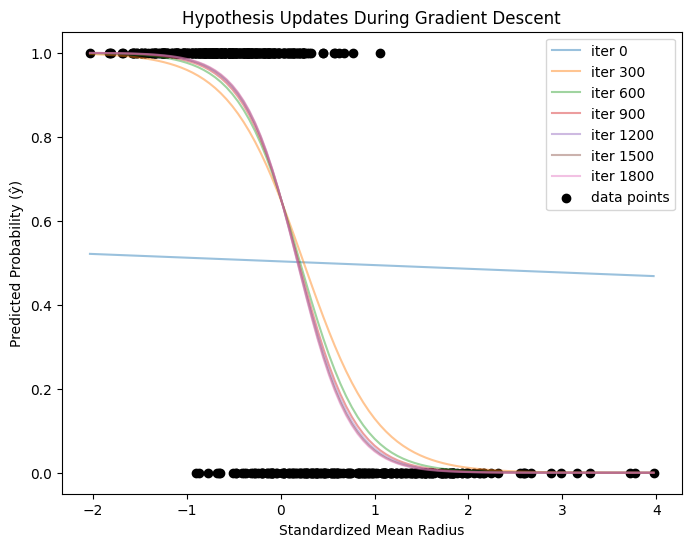

In [23]:
#9. train and show hypothesis changing over iterations
plt.figure(figsize=(8,6))

for i in range(epochs):
    theta, y_hat = gradient_descent(X, y, theta, lr)
    losses.append(compute_loss(y, y_hat))

    #only plot every 300 steps(or graph wont be that readable)
    if i % 300 == 0:
        x_vals = np.linspace(min(X[:,1]), max(X[:,1]), 100)
        h_vals = sigmoid(theta[0] + theta[1] * x_vals)
        plt.plot(x_vals, h_vals, alpha=0.45, label=f"iter {i}")

#plot the actual training data
plt.scatter(X[:,1], y, color="black", label="data points")
plt.xlabel("Standardized Mean Radius")
plt.ylabel("Predicted Probability (ŷ)")
plt.title("Hypothesis Updates During Gradient Descent")
plt.legend()
plt.show()

In [24]:
#10. print required stats
print("Final theta values:", theta)
print("Final training loss:", losses[-1])

# predictions as 0 or 1
pred_labels = (y_hat >= 0.5).astype(int)
accuracy = np.mean(pred_labels == y)
print("Accuracy:", accuracy)

Final theta values: [ 0.64372624 -3.59045382]
Final training loss: 0.29001166860679445
Accuracy: 0.8787346221441125


In [25]:
#11. confusion matrix
TP = np.sum((pred_labels == 1) & (y == 1))
TN = np.sum((pred_labels == 0) & (y == 0))
FP = np.sum((pred_labels == 1) & (y == 0))
FN = np.sum((pred_labels == 0) & (y == 1))

print("\nConfusion Matrix:")
print(f"TP: {TP}  FP: {FP}")
print(f"FN: {FN}  TN: {TN}")


Confusion Matrix:
TP: 333  FP: 45
FN: 24  TN: 167


In [26]:
#12. dot product to show logistic regression forms z
#this is the done with the same structure as the dot product example in the worksheet MVVO part C
sample_z = np.dot(X[0], theta)
print("\nExample z for first training example (dot product):", sample_z)
print("Sigmoid(probability) =", sigmoid(sample_z))


Example z for first training example (dot product): -3.2952313212672983
Sigmoid(probability) = 0.03573514579763249


In [27]:
# EXTRA
#i wanted to do a manual dot product to demonstrate understanding better
example = X[0]
manual_dot = example[0]*theta[0] + example[1]*theta[1]
print("Manual dot product:", manual_dot, "(should match np.dot)")
print("np.dot:", np.dot(example, theta))

Manual dot product: -3.2952313212672983 (should match np.dot)
np.dot: -3.2952313212672983
